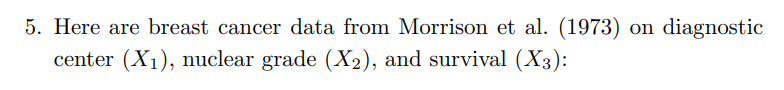
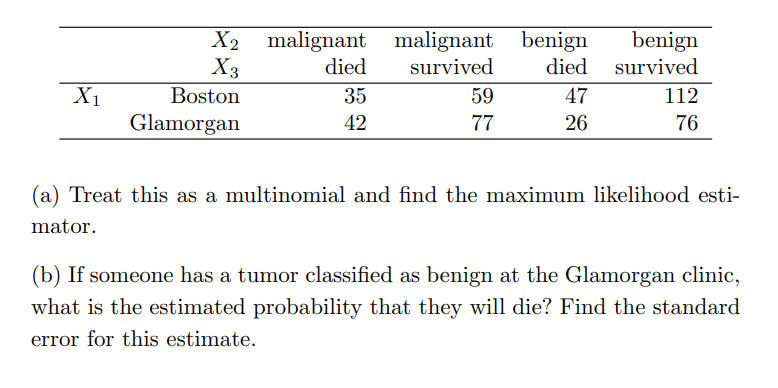
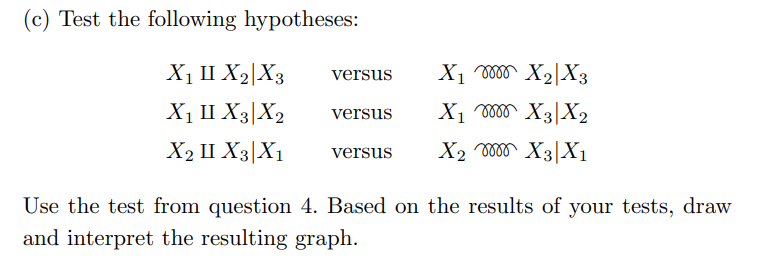

In [83]:
import numpy as np

In [84]:
data=np.array([[[35, 59], [47, 112]], [[42, 77], [26, 76]]])
data

array([[[ 35,  59],
        [ 47, 112]],

       [[ 42,  77],
        [ 26,  76]]])

In [85]:
N = np.sum(data)
print(N)

474


In [86]:
phats = data/np.sum(data)
print(phat)

[[[0.07383966 0.12447257]
  [0.09915612 0.23628692]]

 [[0.08860759 0.16244726]
  [0.05485232 0.16033755]]]


In [121]:
np.sum(phats, axis=(0,2))

array([0.44936709, 0.55063291])

In [88]:
phats11_ = data[1, 1, :]/np.sum(data[1, 1, :])
print(phats11_)

[0.25490196 0.74509804]


In [89]:
p = phats11_[0]
n11_ = np.sum(data[1, 1, :])
se = np.sqrt(p * (1 - p) / n11_)
print(se)

0.04315123327397445


Testing with the log likelihood ratio

is X1 indep X2 given X3?

In [207]:
psi13 = np.sum(phats, axis=1, keepdims=True)/np.sum(phats, axis=(0, 1), keepdims=True)
psi23 = np.sum(phats, axis=0, keepdims=True)/np.sum(phats, axis=(0, 1), keepdims=True)
fH0 = psi13 * psi23 * np.sum(phats, axis=(0, 1), keepdims=True)
np.sum(fH0)

1.0

In [150]:
print(psi13.shape)

(2, 1, 2)


In [208]:
1 - chi2.cdf(2 * np.sum(data * np.log(phats/fH0)), df=2)

0.00101730508794462

is 1 indep of 3 given2?

In [201]:
psi12 = np.sum(phats, axis=2, keepdims=True)/np.sum(phats, axis=(0, 2), keepdims=True)
psi23 = np.sum(phats, axis=0, keepdims=True)/np.sum(phats, axis=(0, 2), keepdims=True)
fH0 = psi12 * psi23 * np.sum(phats, axis=(0, 2), keepdims=True)
fH0

array([[[0.07169034, 0.1266219 ],
        [0.09382123, 0.24162181]],

       [[0.09075692, 0.16029793],
        [0.06018721, 0.15500267]]])

In [202]:
1 - chi2.cdf(2 * np.sum(data * np.log(phats/fH0)), df=2)

0.740792562212054

Is X3 indep X2 given X1?

In [205]:
psi31 = np.sum(phats, axis=1, keepdims=True)/np.sum(phats, axis=(1, 2), keepdims=True)
psi21 = np.sum(phats, axis=2, keepdims=True)/np.sum(phats, axis=(1, 2), keepdims=True)
fH0 = psi31 * psi21 * np.sum(phats, axis=(1, 2), keepdims=True)
fH0

array([[[0.06427511, 0.13403712],
        [0.10872067, 0.22672237]],

       [[0.07724765, 0.17380721],
        [0.06621227, 0.1489776 ]]])

In [206]:
1 - chi2.cdf(2 * np.sum(data * np.log(phats/fH0)), df=2)

0.13052212738007463

Testing with the Chi2_contingency

In [78]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [38]:
chi2_contingency(data)

Chi2ContingencyResult(statistic=17.144923423377172, pvalue=0.0018115520641245552, dof=4, expected_freq=array([[[35.97780804, 77.71206537],
        [44.0854831 , 95.22464349]],

       [[31.42725525, 67.88287133],
        [38.50945361, 83.1804198 ]]]))

In [44]:
phat12 = [chi2_contingency(data[:, :, x]).pvalue for x in range(2)]
phat12

[0.0304962963913761, 0.005631431734024542]

In [45]:
phat13 = [chi2_contingency(data[:, x, :]).pvalue for x in range(2)]
phat13

[0.8815499546126278, 0.5663832507336621]

In [48]:
phat23 = [chi2_contingency(data[x, :, :]).pvalue for x in range(2)]


phat23

[0.2621777889989183, 0.1532759233894334]

In [166]:
chi2_contingency(np.array([[30, 30], [30, 30]]))

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[30., 30.],
       [30., 30.]]))

In [184]:
chi2_contingency(np.sum(data, axis=2))

Chi2ContingencyResult(statistic=12.616716351993695, pvalue=0.00038231233411979503, dof=1, expected_freq=array([[113.68987342, 139.31012658],
       [ 99.31012658, 121.68987342]]))

The most likely model is the 2nd one. i.e. Center ---- Grade ----- Survival